# Lab : Titanic EDA
---
## Step 1 : import data and reading the data
---
**Feature information**
- PassengerId 
- Survived : 1 = Yes, 0 = No
- Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
- Name 
- Sex
- Age : Age in years
- SibSp : # of siblings / spouses aboard the Titanic    
- Parch : # of parents / children aboard the Titanic
- Ticket : Ticket number    
- Fare : Passenger fare 
- Cabin : Cabin number 
- Embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Variable note**

pclass : A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

Parch
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Pastel1')
import missingno as msno

In [2]:
#!pip install missingno

In [3]:
# Load csv as pandas dataframe
df = pd.read_csv('./train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Step 2 : Cleaning the data
---

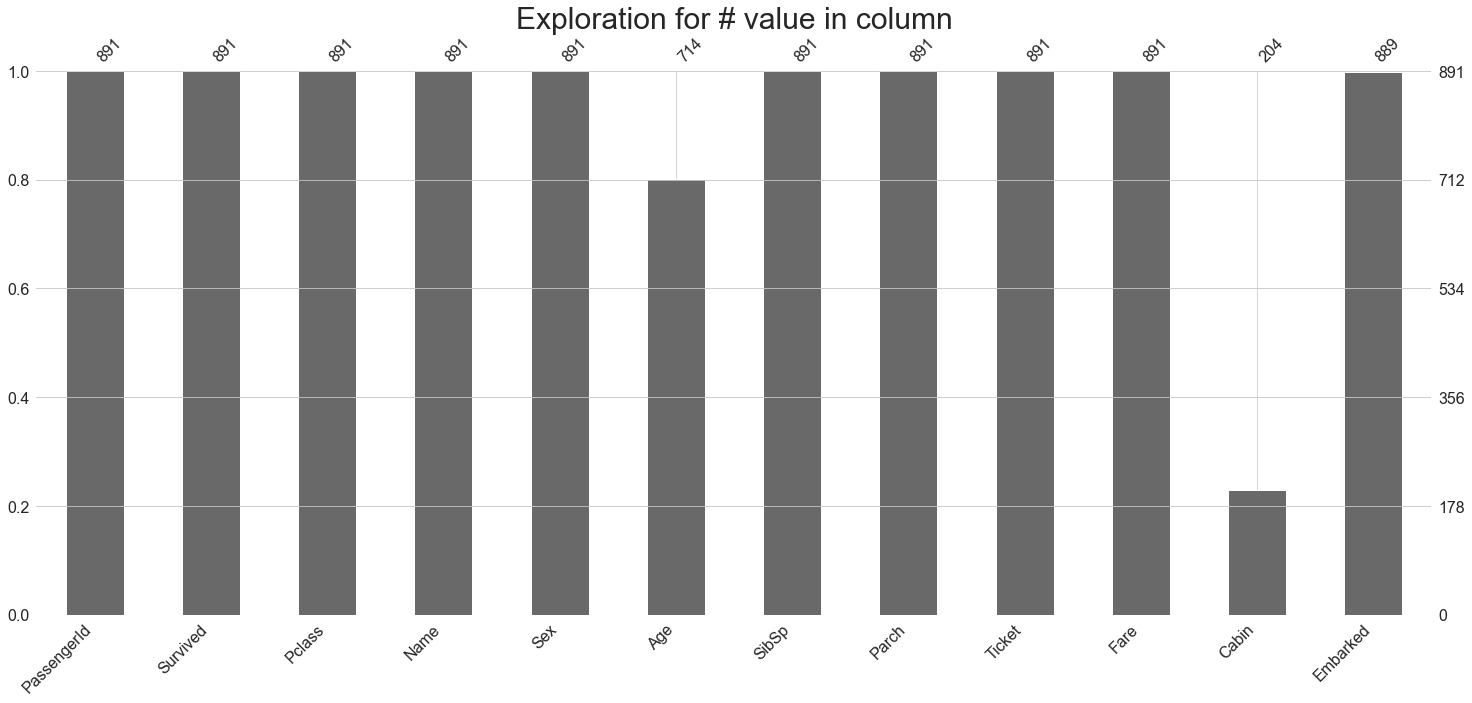

In [8]:
# 1.Create a bar chart showing how many missing values are in each column
msno.bar(df)
plt.title('Exploration for # value in column',fontsize = 30);

In [9]:
# 2.Which column has the most NaN values? How many cells in that column are empty?
missing = df.isna().sum().sort_values(ascending = False)
print(f'Column {missing.index[0]} has the most NaN value. ({missing[0]} columns)')

Column Cabin has the most NaN value. (687 columns)


In [10]:
# 3.Delete all rows where Embarked is empty
df.dropna(subset = ['Embarked'],inplace = True)

In [11]:
# 4.Fill all empty cabins with ¯\(ツ)/¯
df['Cabin'].fillna('¯\(ツ)/¯',inplace = True)

## Step 3 : Feature extraction
---

In [12]:
# 1.Create FamilyCount column which is sum number of sibling/spouses and parent/children columns.
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [13]:
# 2.Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
Reverend = df['Name'].str.extract(' ([A-Za-z]+)\.',expand = True) == 'Rev' # Extract Title in Name
df['IsReverend'] = Reverend.replace({True : 1, False : 0})

In [14]:
# 3.Convert categorical to dummy variable (Embarkes column)
df_dummy = pd.get_dummies(df,columns = ['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0,1,0,0


In [15]:
# 3.Convert categorical to dummy variable (Sex column)
df_dummy = pd.get_dummies(df_dummy,columns = ['Sex'])
df_dummy

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,¯\(ツ)/¯,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,0,0,0,1


In [16]:
# 3.BONUS: Extract the title from everyone's name and create dummy columns
df_bonus = df.copy()
Title = df['Name'].str.extract(' ([A-Za-z]+)\.',expand = True)
df_bonus['title'] = Title
df_bonus_dummy = pd.get_dummies(df_bonus,columns = ['title'])
df_bonus_dummy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Major,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis
---

In [86]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [39]:
# 1.What was the survival rate overall?
print('Overall survival rate was', round(df['Survived'].mean()*100,2), '%.')

Overall survival rate was 38.25 %.


In [42]:
# 2.Which gender fared the worst? What was their survival rate?
df.groupby(['Sex'])[['Fare','Survived']].agg(['mean']).round(2)
# Average male's fare is worst than female.
# Female survival rate is 74%. Male survival rate is 19%.

,Fare,Survived
,mean,mean
Sex,,
female,44.25,0.74
male,25.52,0.19


In [77]:
# 3.What was the survival rate for each Pclass?
df.groupby(['Pclass'])[['Survived']].agg(['mean'])*100

,Survived
,mean
Pclass,
1,62.616822
2,47.282609
3,24.236253


In [78]:
# 4.Did any reverends survive? How many?
df.groupby(['IsReverend'])[['Survived']].agg(['mean'])*100
# Reverends weren't survived in this titanic case. 

,Survived
,mean
IsReverend,
0,38.505096
1,0.000000


In [70]:
# 5.What is the survival rate for cabins marked ¯\(ツ)/¯
survived_cabin = round(df[df['Cabin'] == '¯\(ツ)/¯']['Survived'].mean()*100,2)
print('The survival rate for cabins marked ¯\(ツ)/¯ is',survived_cabin,'%.')

The survival rate for cabins marked ¯\(ツ)/¯ is 29.99 %.


In [71]:
# 6.What is the survival rate for people whose Age is empty?
Empty_age = round(df[df['Age'].isna()]['Survived'].mean()*100,2)
print('The survival rate for people whose Age is empty is',Empty_age,'%.')

The survival rate for people whose Age is empty is 29.38 %.


In [76]:
# 7.What is the survival rate for each port of embarkation?
df.groupby(['Embarked'])[['Survived']].agg(['mean'])*100

,Survived
,mean
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [80]:
# 8.What is the survival rate for children (under 12) in each Pclass?
df[df['Age'] < 12].groupby(['Pclass'])[['Survived']].mean()*100

,Survived
Pclass,
1,75.000000
2,100.000000
3,40.425532


In [108]:
# 9.Did the captain of the ship survive? Is he on the list?
df[df['Name'].str.contains('Capt')][['Name','Survived']]

,Name,Survived
745,"Crosby, Capt. Edward Gifford",0


In [114]:
# 10.Of all the people that died, who had the most expensive ticket? How much did it cost?
df[df['Survived'] == 0][['Fare','Name']].sort_values('Fare',ascending = False).head(1)

,Fare,Name
27,263.0,"Fortune, Mr. Charles Alexander"


In [129]:
# 11.Does having family on the boat help or hurt your chances of survival?
print('The survival rate of people that have family is',round(df[df['FamilyCount'] > 0]['Survived'].mean()*100,2), "%.")
df.groupby(['FamilyCount'])[['Survived']].mean()*100
# People having family on boat had higher chances of survival. 

The survival rate of people that have family is 50.56 %.


,Survived
FamilyCount,
0,30.093458
1,55.279503
2,57.843137
3,72.413793
4,20.000000
5,13.636364
6,33.333333
7,0.000000
10,0.000000


## Step 5: Plotting
---

In [ ]:
# Create several charts showing the survival rates of different groups of people

In [176]:
df.nunique().sort_values()

Survived         2
Sex              2
IsReverend       2
Pclass           3
Embarked         3
SibSp            7
Parch            7
FamilyCount      9
Age             88
Cabin          147
Fare           247
Ticket         680
PassengerId    889
Name           889
dtype: int64

In [349]:
def plot_survival_rate(df,group,color='Pastel1',ax=None,title = None):
    """Plotting barplot between column in titanic dataset and survival rate
       
       Parameter
       ---------
       group : column in the dataframe
       ax : ax for filling the subplot
       color : color of the bar chart
    """
    group_sur = df.groupby([group])[['Survived']].mean()*100
    group_sur.plot(kind = 'bar',ylim = (0,100),ax = ax,colormap = color)
    if title == None:
        ax.set(title = group + ' Survival rate')
    else :
        ax.set(title = title)

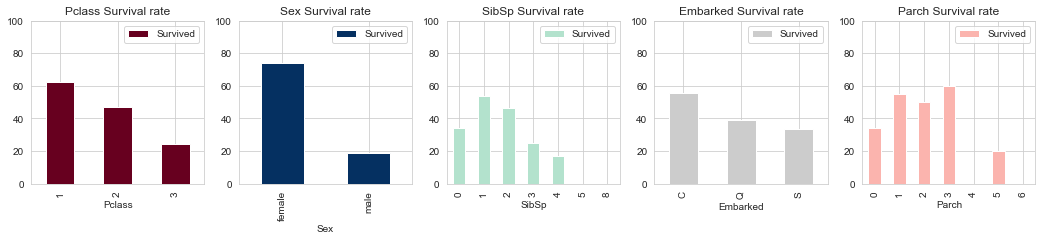

In [350]:
fig, ax = plt.subplots(ncols = 5,figsize = (18,3))

plot_survival_rate(df,'Pclass','RdBu',ax[0])
plot_survival_rate(df,'Sex','RdBu_r',ax[1])
plot_survival_rate(df,'SibSp','Pastel2',ax[2])
plot_survival_rate(df,'Embarked','Pastel2_r',ax[3])
plot_survival_rate(df,'Parch','Pastel1',ax[4])

plt.tight_layout;

Passenger, age was about 21.0, had the worst survival rates.
Kid, age was below 10(left side of green line), tend to survive more than other age range.


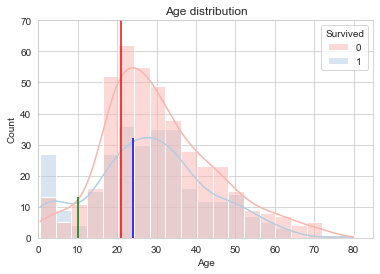

In [329]:
sns.histplot(data = df, x ='Age',hue = 'Survived',kde = True);
plt.title('Age distribution')
plt.ylim((0,70))
plt.xlim((0,85))
plt.vlines(x = df[df['Survived'] == 1]['Age'].mode(),ymin = 0,ymax = 32,colors = 'b');
plt.vlines(x = df[df['Survived'] == 0]['Age'].mode(),ymin = 0,ymax = 70,colors = 'r');
plt.vlines(x = 10,ymin = 0,ymax = 13,colors = 'g');
print(f'''Passenger, age was about {df[df['Survived'] == 0]['Age'].mode()[0]}, had the worst survival rates.''')
print(f'''Kid, age was below 10(left side of green line), tend to survive more than other age range.''')

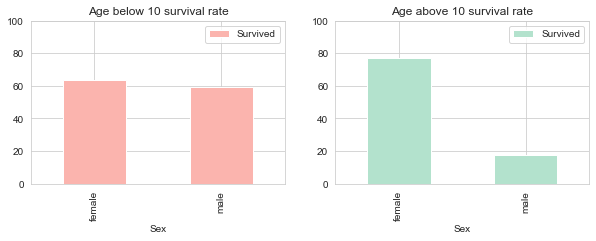

In [351]:
fig1, ax1 = plt.subplots(ncols = 2,figsize = (10,3))
kid_below10_df = df[df['Age'] < 10]
plot_survival_rate(kid_below10_df,'Sex',color='Pastel1',ax=ax1[0],title = 'Age below 10 survival rate')
above10_df = df[df['Age'] > 10]
plot_survival_rate(above10_df,'Sex',color='Pastel2',ax=ax1[1],title = 'Age above 10 survival rate')

Passenger, fare was about 8.05, had the worst survival rates(Mode of Fare was 8.05).


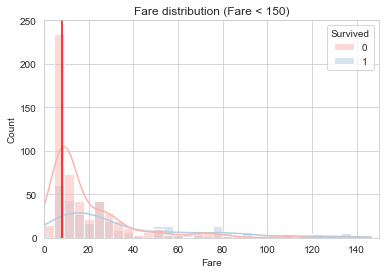

In [305]:
# Limit Fare < 150 for handling outlier
sns.histplot(data = df[df['Fare'] < 150],x = 'Fare',hue = 'Survived',kde = True);
plt.ylim((0,250))
plt.xlim((0,150))
plt.title('Fare distribution (Fare < 150)')
plt.vlines(x = df[df['Survived'] == 0]['Fare'].mode(),ymin = 0,ymax = 250,colors = 'r');
print(f'''Passenger, fare was about {df[df['Survived'] == 0]['Fare'].mode()[0]}, had the worst survival rates(Mode of Fare was {df['Fare'].mode()[0]}).''')